# AI Community @ Семинар №1

## Numpy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


### **Зачем NumPy** 
#### Векторизация

Векторизация - представление операций над многомерными массивами, как операций над скалярами 

In [3]:
# Создаём список с помощью python и numpy
ap = range(4)
an = np.arange(4)

Возведём каджый элемент массива в квадрат

In [4]:
[i**2 for i in ap]

[0, 1, 4, 9]

In [5]:
an**2

array([0, 1, 4, 9], dtype=int32)

In [6]:
bp = [2, 2, 2, 2]
bn = np.full((4,), 4)
bp, bn

([2, 2, 2, 2], array([4, 4, 4, 4]))

Сложим поэлементно значения векторов a и b

In [7]:
[a + b for a, b in zip(ap, bp)]

[2, 3, 4, 5]

In [8]:
an + bn

array([4, 5, 6, 7])

Но надо быть внимательным к размерностям массивов, над которыми производятся операции

In [9]:
cn = np.ones((2, 3))
cn

array([[1., 1., 1.],
       [1., 1., 1.]])

In [10]:
dn = np.eye(2)
dn

array([[1., 0.],
       [0., 1.]])

In [11]:
cn + dn

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

#### Broadcasting
Broadcasting в numpy - правило обработки операций над массивами разной размерности. Умножение массива на скаляр - пример броадкастинга.


In [12]:
an = np.zeros((4, 3))
bn = np.arange(1, 4)
print(an, an.shape, sep='\n')
print()
print(bn, bn.shape, sep='\n')

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(4, 3)

[1 2 3]
(3,)


In [13]:
an + bn

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [14]:
np.zeros((4, 2, 3)) + bn

array([[[1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.]]])

In [15]:
np.zeros((4, 3, 2)) + bn

ValueError: operands could not be broadcast together with shapes (4,3,2) (3,) 

Правила бродкастинга
1. Размерности операндов выстраиваются относительно правого значения и массив меньшей размерности копируется вдоль недостающих размерностей
```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

2. Если длина размерности массива A равна 1, а длина соответствующей размерности массива B не равна 1, то значения массива А копируются вдоль этой размерности
```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

Создать необходимую размерность можно следующими способами:
```python
a[None] # добавит новую размерность в начало
a[..., None] # добавит новую размернось в конец
a[:, None] # добавит новую размернось под индексом, равному количеству ":," перед None
a[np.newaxis] # замаскированный None
np.expand_dims(a, dim)  # Создаст несколько размерностей под индексами, указанными в dims. 
                        # Если под указанным индексом существует размерность, то эта и все последующие размерности сдвигаются вправо
np.reshape(a, shape)  # Изменяет форму массива (лучше не использовать для добавления новых размерностей, велика вероятность "сломать" массив)
```

In [16]:
bn = np.arange(0, 6)
print(bn.shape)
print(bn[None].shape)
print(bn[..., None].shape)
print(bn[:, None].shape)
print(np.expand_dims(bn, (1, 0)).shape)
print(np.expand_dims(bn, (0, 2)).shape)
print(np.reshape(bn, (1, 1, 6)).shape)
print(np.reshape(bn, (1, 6, 1)).shape)

(6,)
(1, 6)
(6, 1)
(6, 1)
(1, 1, 6)
(1, 6, 1)
(1, 1, 6)
(1, 6, 1)


In [17]:
np.reshape(bn, (2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

In [18]:
np.reshape(bn, (3, 2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [19]:
# Если неизвестна длина размерности, то можно один раз указать -1 и numpy посчитает её самостоятельно, исходя из количества элементов.
np.reshape(bn, (1, -1, 2)).shape

(1, 3, 2)

In [20]:
# Если длины размерностей указаны неверно, то будет ошибка
np.reshape(bn, (1, 2, 4)).shape

ValueError: cannot reshape array of size 6 into shape (1,2,4)

Правильное использование броадкастинга значительно облегчает написание некоторых операций

In [21]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, None] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

#### Эффективность
Так как Numpy внутри написан на сильно оптимизированном С коде, то стандартные операции выполняются на несколько порядков быстрее, чем на чистом Python коде

In [22]:
L = range(100000)
%timeit [i**2 for i in L]

37.2 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
a = np.arange(100000)
%timeit a**2

79.8 µs ± 799 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Интерактивная справка, аналогична зажатию Shift + Tab на нужной функции или объекте

In [24]:
?np.array  

Docstring:
array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (row major) unless 'F' is
    specified, in which case it will be in Fortran order (column major).
    If

Поиск в документации

In [25]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a 

Поиск подходящего названия атрибута, аналогична нажатию Tab на недописанном названии

In [26]:
np.con*?

np.concatenate
np.conftest
np.conj
np.conjugate
np.convolve

#### Библиотеку принято импортировать так

In [27]:
import numpy as np

## Создание массивов

* **1-D**:


In [28]:
np.from*?

np.frombuffer
np.fromfile
np.fromfunction
np.fromiter
np.frompyfunc
np.fromregex
np.fromstring

In [29]:
np.fromiter(map(int, ['1']*10), dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [31]:
a.ndim

1

In [32]:
a.shape

(4,)

In [33]:
len(a)

4

* **2-D, 3-D, ...**:


In [34]:
b = np.array([(0, 1, 2), [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [35]:
b.ndim

2

In [36]:
b.shape

(2, 3)

In [37]:
len(b)     # returns the size of the first dimension

2

In [38]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [39]:
c.shape

(2, 2, 1)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [40]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
b = np.arange(1, 4, 0.5) # start, end (exclusive), step
b

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

- по числу элементов:


In [42]:
c = np.linspace(0, 1, 7)   # start, end, num-points
c

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

In [43]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [44]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [46]:
a = np.full((3, 3), 5)  # reminder: (3, 3) is a tuple
a

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

In [47]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [49]:
c = np.eye(3, 4)
c

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [50]:
d = np.diag(np.array([1, 2, 3, 4]))

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [51]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.50755507, 0.0211933 , 0.43352176, 0.44631306])

In [53]:
b = np.random.randn(4)      # Gaussian
b  

array([ 0.65034618, -0.51433646,  0.53942869,  1.52676162])

In [54]:
np.random.seed(1234)        # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [55]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [56]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [57]:
c = np.array([1, 2, 3], dtype='float16')
c.dtype

dtype('float16')

In [58]:
a = np.ones((3, 3), dtype='int8')
a.dtype

dtype('int8')

Типы можно легко менять с помощью метода astype (возвращает новый массив), либо явно меняя dtype массива

In [59]:
print(a.astype('uint8').dtype)
print(a.astype(np.float16).dtype)
print(a.dtype)
a.dtype = 'uint8'
print(a.dtype)

uint8
float16
int8
uint8


Будьте внимательны при смене исходного типа на тип меньшего размера 

In [60]:
a = np.full((2,), -99999.9, dtype='float32')
a

array([-99999.9, -99999.9], dtype=float32)

In [61]:
a.astype('uint8')

array([97, 97], dtype=uint8)

In [62]:
-99999.9 % 256

96.10000000000582

Прочие типы данных:

- Комплексные числа


In [63]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

 - Bool


In [64]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [65]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [66]:
from IPython.display import clear_output

In [67]:
!conda install seaborn --yes
clear_output()

In [68]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib* и *Seaborn*, чтобы графики выглядели красиво


In [69]:
import matplotlib.pyplot as plt  # the tidy way
import seaborn as sns
sns.set()

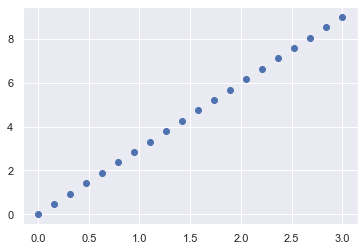

In [70]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.scatter(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Или с использованием *pylab*:


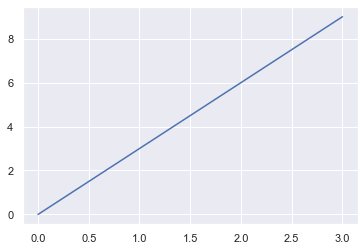

In [71]:
plot(x, y)       # line plot    

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


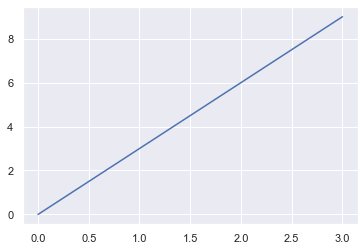

In [72]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

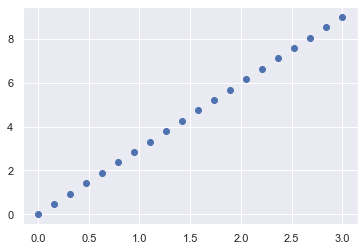

In [73]:
plt.plot(x, y, 'o')  # dot plot    

- Отображение двухмерных или трёхмерных массивов (например, изображений):


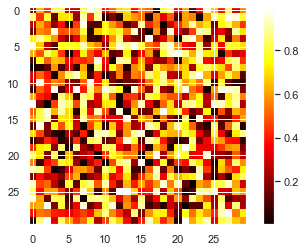

In [74]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

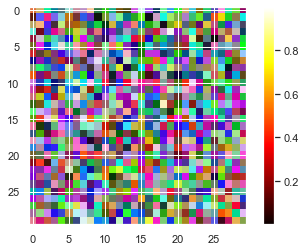

In [75]:
image = np.random.rand(30, 30, 3)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [76]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [78]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы - это кортежи целых чисел


In [79]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [80]:
a[1, 1]

1

In [81]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [82]:
a[1]

array([0, 1, 0])

In [83]:
a[:, 1]

array([ 0,  1, 10])

**Срезы**

In [84]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Последний индекс не включается

In [86]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [87]:
a[1:3]

array([1, 2])

In [88]:
a[::2]

array([0, 2, 4, 6, 8])

In [89]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [90]:
a = np.arange(10)
a[5:] = (1, 2, 3, 4, 5)
a

array([0, 1, 2, 3, 4, 1, 2, 3, 4, 5])

In [91]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Пример. Простые числа

Отобразить вектор, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

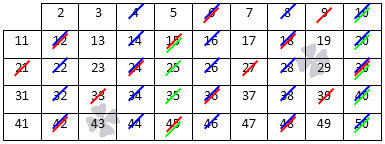

* Создадим массив `is_prime`, заполненний значениями True


In [92]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [93]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [94]:
N_max = int(np.sqrt(len(is_prime)))
for j in np.arange(2, N_max):
    is_prime[2*j::j] = False
    
np.arange(100)[is_prime]

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

## Индексирование масками

In [95]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [96]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [97]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [98]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Индексирование массивом целых чисел

In [99]:
a = np.arange(0, 100).reshape((10, 10))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [100]:
a[[1, 3, 5], [2, 4, 7]]  # note: [2, 3, 2, 4, 2] is a Python list

array([12, 34, 57])

In [101]:
a[[9, 7]] = -100
a

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [  10,   11,   12,   13,   14,   15,   16,   17,   18,   19],
       [  20,   21,   22,   23,   24,   25,   26,   27,   28,   29],
       [  30,   31,   32,   33,   34,   35,   36,   37,   38,   39],
       [  40,   41,   42,   43,   44,   45,   46,   47,   48,   49],
       [  50,   51,   52,   53,   54,   55,   56,   57,   58,   59],
       [  60,   61,   62,   63,   64,   65,   66,   67,   68,   69],
       [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100],
       [  80,   81,   82,   83,   84,   85,   86,   87,   88,   89],
       [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

In [102]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [103]:
a[idx]

array([[3, 4],
       [9, 7]])

### 3D графики и функции по площади

![](https://upload.wikimedia.org/wikipedia/commons/5/57/Multivariate_Gaussian.png)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

In [104]:
def norm(x, mu, sigma):
    diff = x - mu
    ex = np.exp(-1/2 * (diff/sigma)**2)
    result = ex / (sigma * (2*np.pi)**0.5)
    return result

In [105]:
mu_x = 50
mu_y = 50

sigma_x = 15
sigma_y = 15

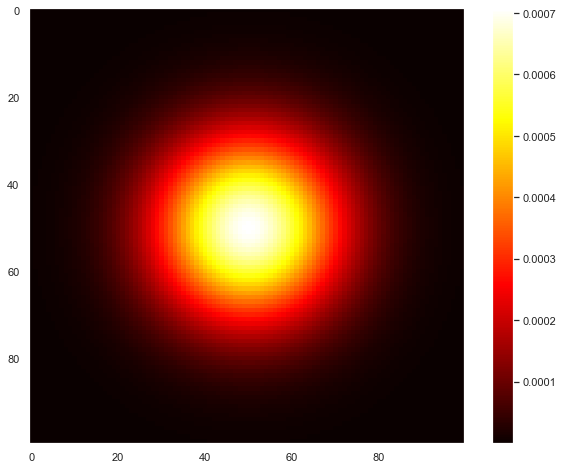

In [106]:
w = 100
h = 100
res = np.fromfunction(lambda x, y: norm(x, mu_x, sigma_x) * norm(y, mu_y, sigma_y), (w, h))
fig = plt.figure(figsize=(10, 8))
plt.grid(False)
plt.imshow(res, cmap=plt.cm.hot)
plt.colorbar()

In [108]:
xs = np.arange(h)
ys = np.arange(w)
xs, ys = np.meshgrid(xs, ys)
xs, ys

(array([[ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        ...,
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99]]),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [97, 97, 97, ..., 97, 97, 97],
        [98, 98, 98, ..., 98, 98, 98],
        [99, 99, 99, ..., 99, 99, 99]]))

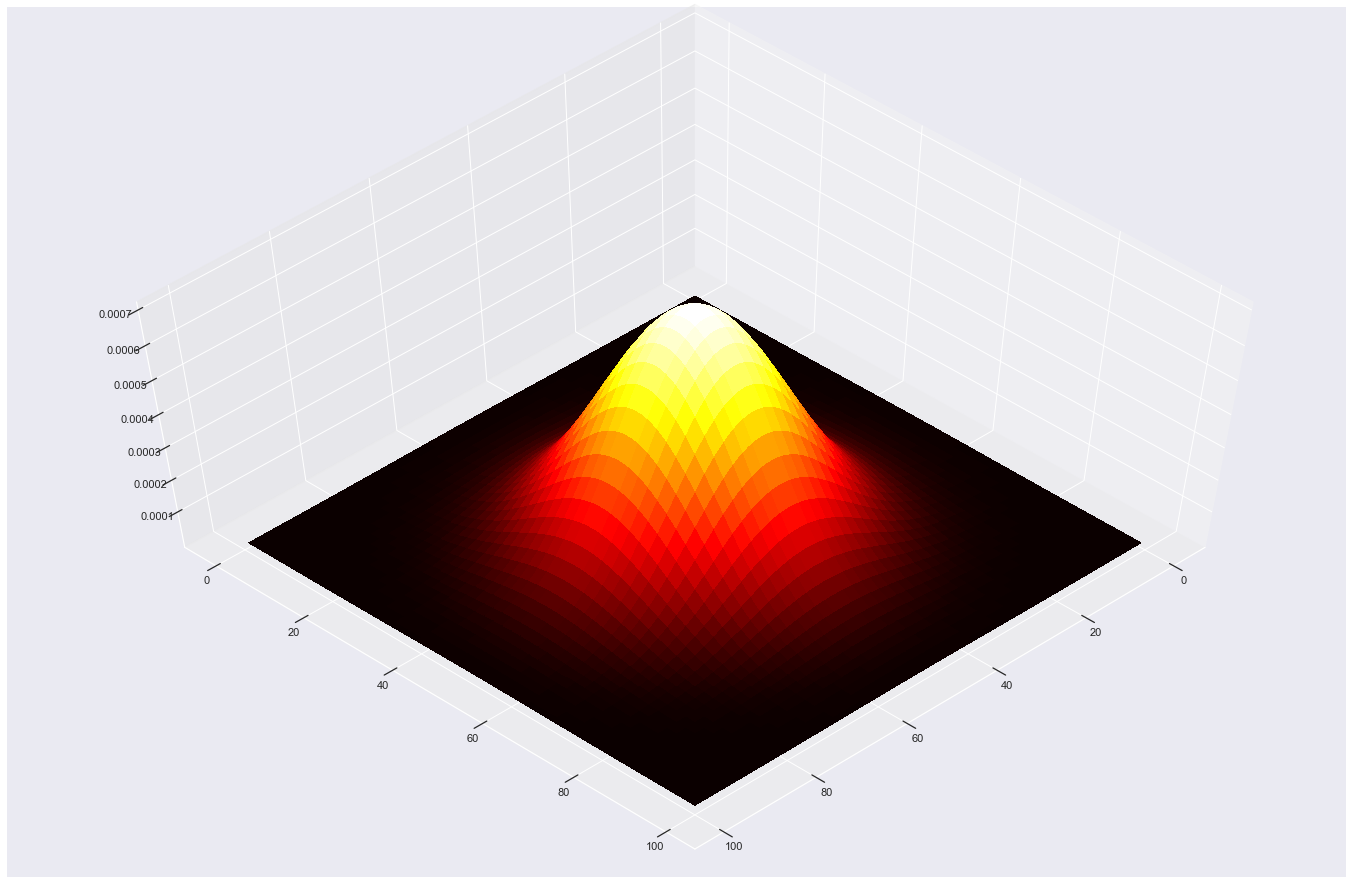

In [109]:
from mpl_toolkits.mplot3d import Axes3D
# Make the plot
fig = plt.figure(figsize=(24, 16))
ax = fig.gca(projection='3d')



surf=ax.plot_surface(X=xs, Y=ys, Z=res, cmap=plt.cm.hot, linewidth=0.0, antialiased=False)

# Rotate it
ax.view_init(60, 45)
plt.show()